### Imports

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn
import librosa
import librosa.display
from IPython.display import Audio
import numpy as np
import scipy
import sklearn
import os, requests

### Get Our 10 90's West Coast songs

In [12]:
# 1 minute chunk of each song offset by 1 minute.

x1, sr1 = librosa.load("songs/All Eyez On Me.mp3",duration=60,offset=60)
x2, sr2 = librosa.load("songs/Boyz In The Hood.mp3",duration=60,offset=60)
x3, sr3 = librosa.load("songs/California Love.mp3",duration=60,offset=60)
x4, sr4 = librosa.load("songs/Gin And Juice.mp3",duration=60,offset=60)
x5, sr5 = librosa.load("songs/It Was A Good Day.mp3",duration=60,offset=60)
x6, sr6 = librosa.load("songs/No Vaseline.mp3",duration=60,offset=60)
x7, sr7 = librosa.load("songs/Nuthin' But A G Thang.mp3",duration=60,offset=60)
x8, sr8 = librosa.load("songs/Regulate.mp3",duration=60,offset=60)
x9, sr9 = librosa.load("songs/Straight Outta Compton.mp3",duration=60,offset=60)
x10, sr10 = librosa.load("songs/The Next Episode.mp3",duration=60,offset=60)

/home/imnemato/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/imnemato/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/imnemato/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/imnemato/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/imnemato/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instea

#### Organize songs into list

In [13]:
songs = [(x1,sr1,'All Eyes on Me'),(x2,sr2,'Boyz in The Hood'),(x3,sr3,'California Love'),(x4,sr4,'Gin and Juice'),(x5,sr5,'It Was a Good Day'),(x6,sr6,'No Vaseline'),(x7,sr7,'Nuthin But a G Thang'),(x8,sr8,'Regulate'),(x9,sr9,'Straight Outta Compton'),(x10,sr10,'The Next Episode')]

## Songs:
##### Uncomment to listen

#### "All Eyes on Me"

In [1]:
#Audio(x1,rate=sr1)

#### "Boyz in the Hood"

In [2]:
#Audio(x2,rate=sr2)

#### "California Love"

In [3]:
#Audio(x3,rate=sr3)

#### "Gin and Juice"

In [4]:
#Audio(x4,rate=sr4)

#### "It Was a Good Day"

In [5]:
#Audio(x5,rate=sr5)

#### "No Vaseline"

In [6]:
#Audio(x6,rate=sr6)

#### "Nuthin But a G Thang"

In [7]:
#Audio(x7,rate=sr7)

#### "Regulate"

In [8]:
#Audio(x8,rate=sr8)

#### Straight Outta Compton

In [9]:
#Audio(x9,rate=sr9)

#### "The Next Episode"

In [10]:
#Audio(x10,rate=sr10)

## Wave Plots

All Eyes on Me:


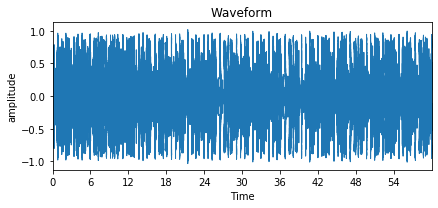

Boyz in The Hood:


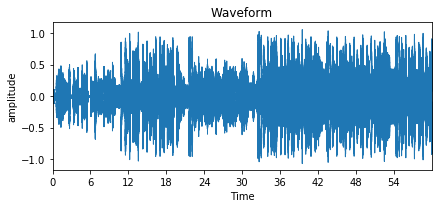

California Love:


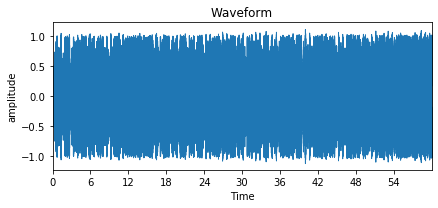

Gin and Juice:


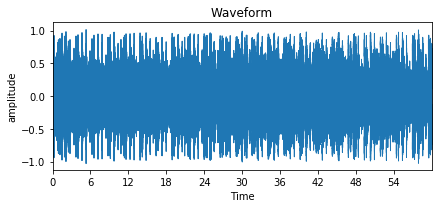

It Was a Good Day:


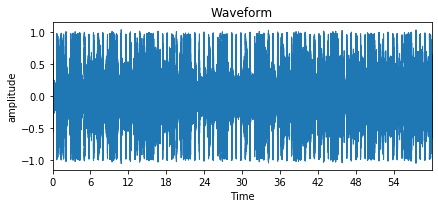

No Vaseline:


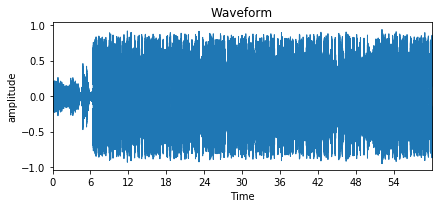

Nuthin But a G Thang:


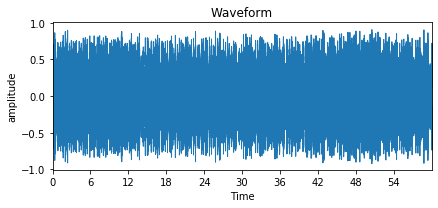

Regulate:


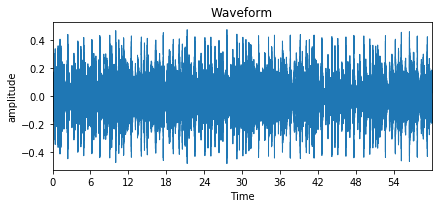

Straight Outta Compton:


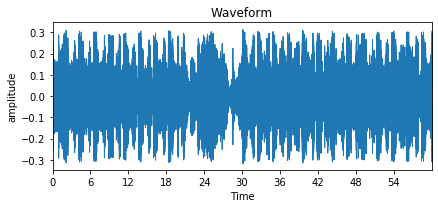

The Next Episode:


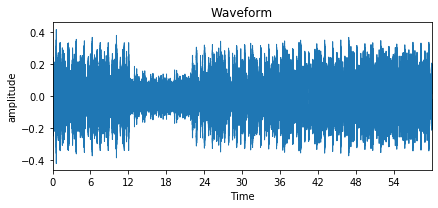

In [40]:
#show wave plot for each song, to get an idea of the shape of the song
for song in songs:
    x = song[0]
    sr = song[1]
    plt.figure(figsize=(6,3))
    librosa.display.waveplot(x, sr=sr)
    plt.title('Waveform')
    plt.tight_layout()
    plt.ylabel("amplitude")
    print(song[2]+":")
    plt.show()

## Fourier Transform
### With top notes

All Eyes on Me:
Top Note: D3


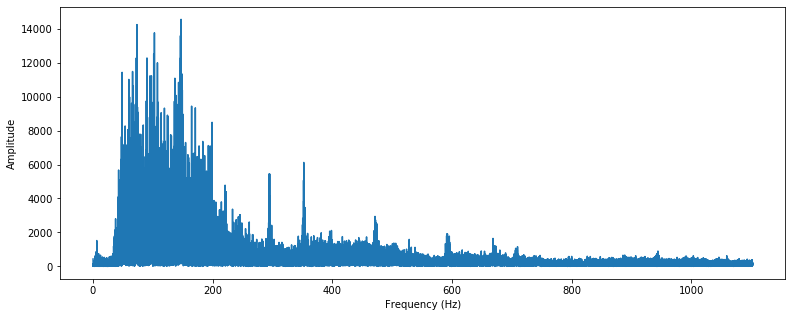

Boyz in The Hood:
Top Note: G#1


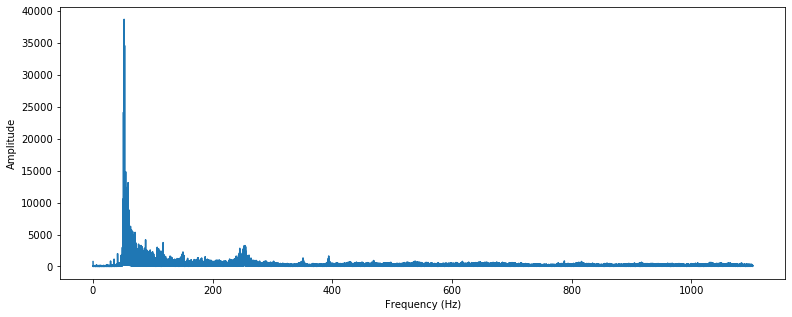

California Love:
Top Note: G#1


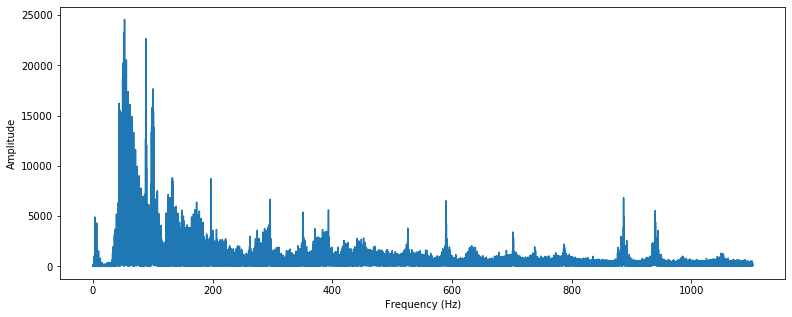

Gin and Juice:
Top Note: G1


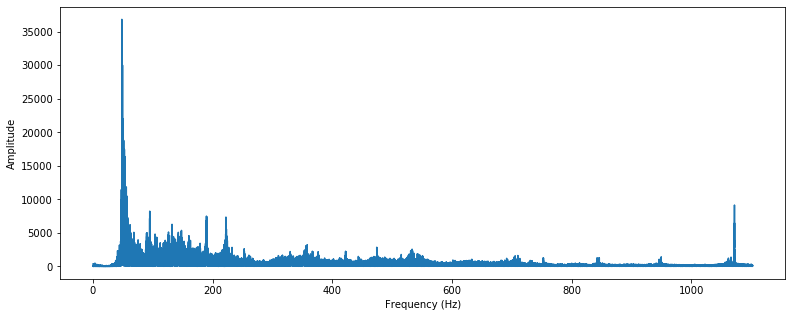

It Was a Good Day:
Top Note: F10


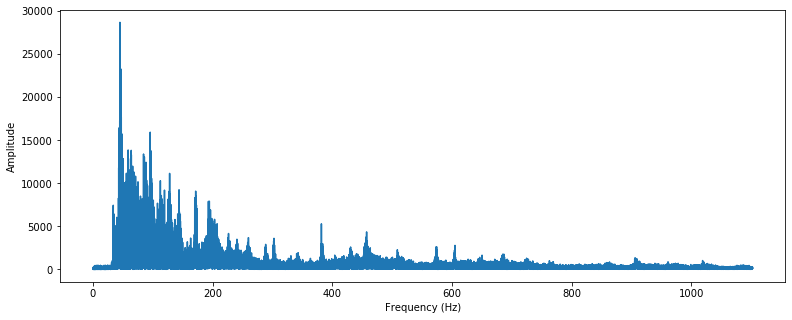

No Vaseline:
Top Note: G1


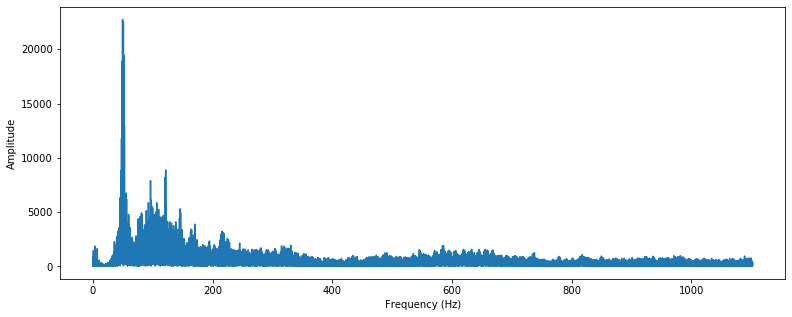

Nuthin But a G Thang:
Top Note: F10


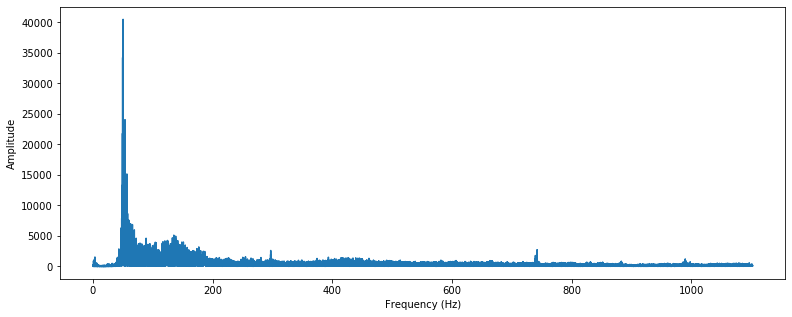

Regulate:
Top Note: G1


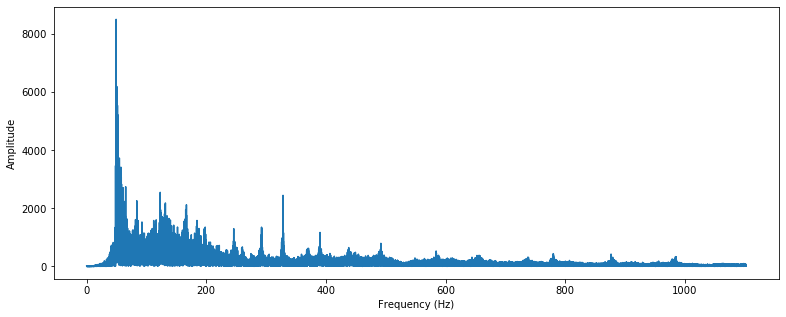

Straight Outta Compton:
Top Note: G1


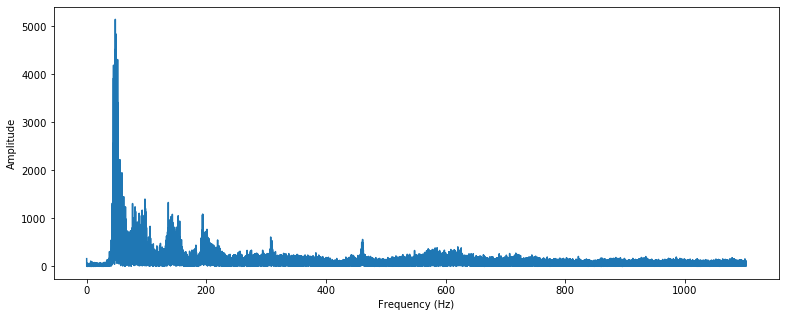

The Next Episode:
Top Note: A1


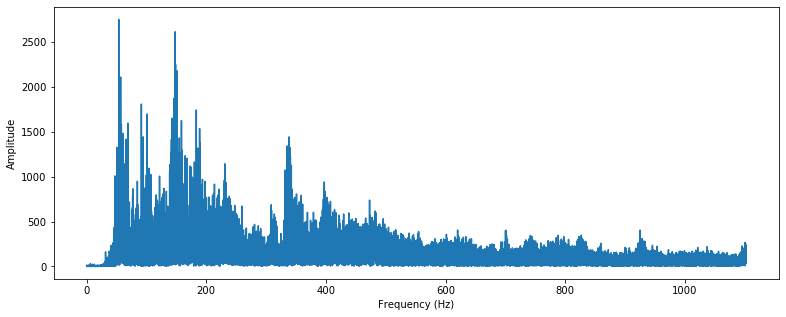

In [19]:
#fourier transform for each song
for song in songs:
    x = song[0]
    sr = song[1]
    X = scipy.fft(x)
    X_mag = np.absolute(X)
    # frequency variable
    f = np.linspace(0, sr, len(X_mag))
    plt.figure(figsize=(13, 5))
    #get closer chunk of peak (up to 5% of length of f)
    plt.plot(f[:66150], X_mag[:66150])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    #name of each song
    print(song[2]+':')
    max_pos = X_mag.argmax()
    #print the top note for each song
    print('Top Note: ' + librosa.hz_to_note(f[max_pos]))
    plt.show()

## Chroma

All Eyes on Me:


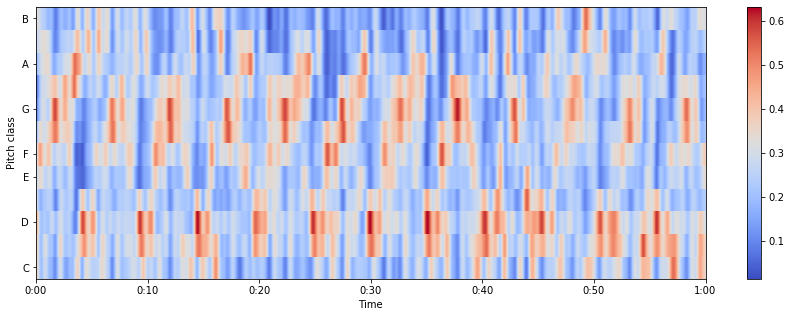

Boyz in The Hood:


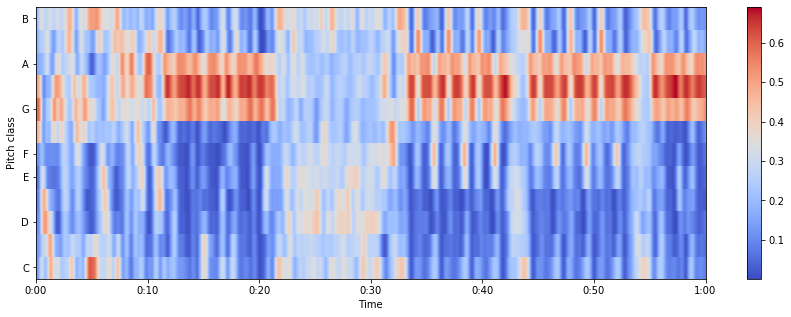

California Love:


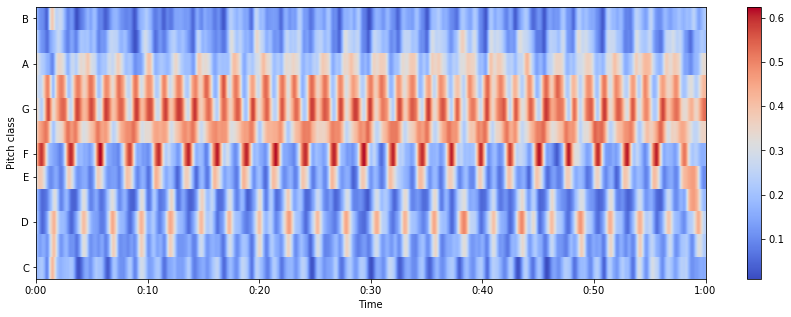

Gin and Juice:


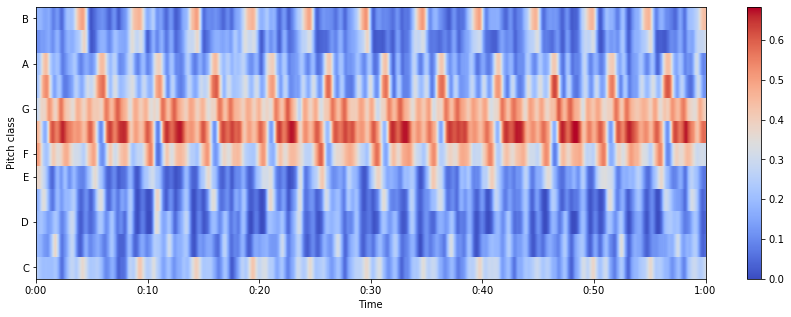

It Was a Good Day:


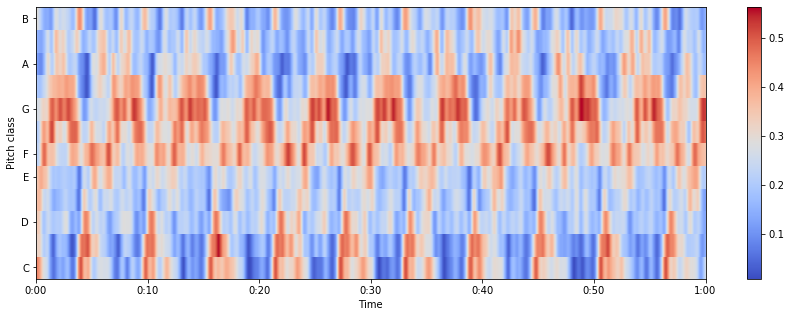

No Vaseline:


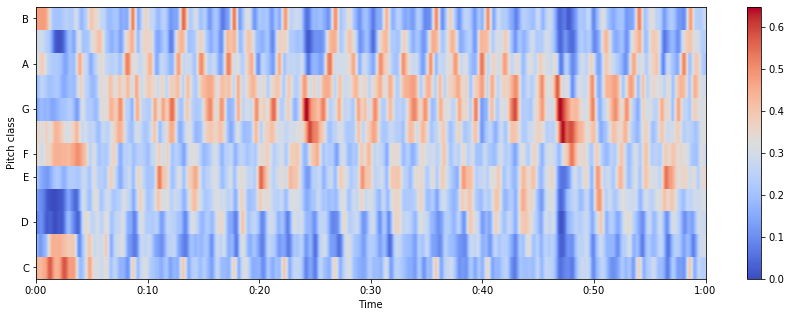

Nuthin But a G Thang:


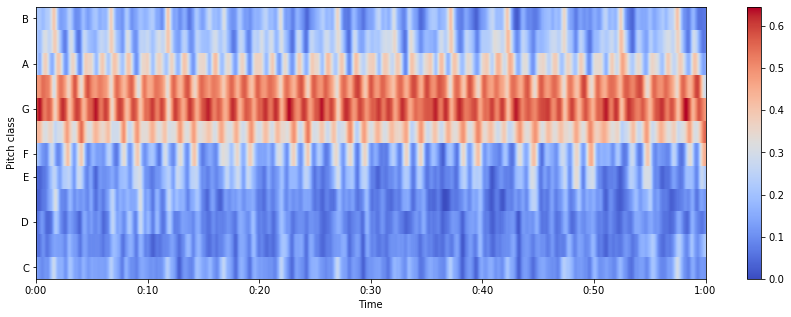

Regulate:


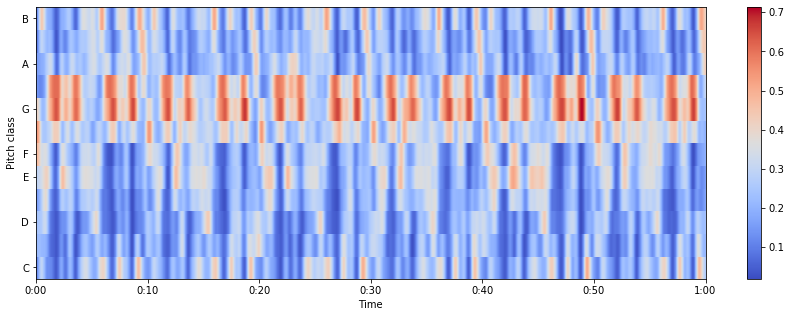

Straight Outta Compton:


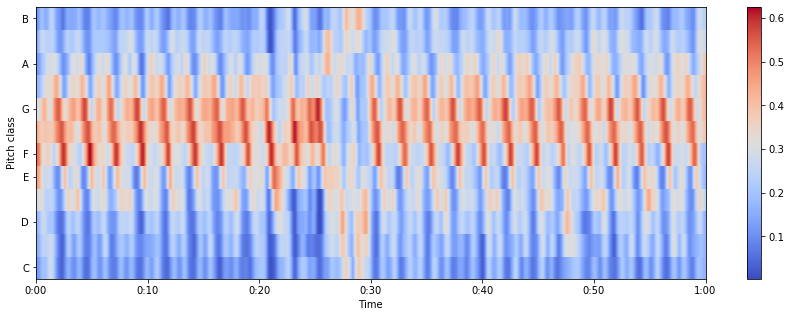

The Next Episode:


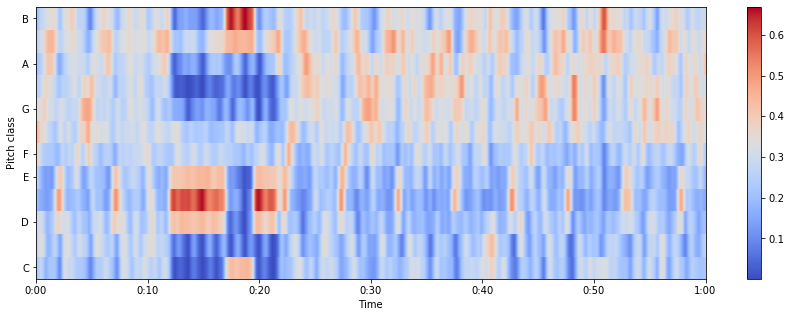

In [79]:
#calculate the chroma graph for each song
for song in songs:
    x = song[0]
    sr = song[1]
    chromagram = librosa.feature.chroma_cens(x, sr=sr, hop_length=512)
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
    #name of song for each graph
    print(song[2]+":")
    # add color bar
    plt.colorbar()
    plt.show()

## Zero Crossing

In [62]:
#calculate the total number of zero crossings for each song
for song in songs:
    x = song[0]
    print(song[2]+':')
    print('Total # of Zero Crossings: '+ str(sum(librosa.zero_crossings(x, pad=False)))+'\n')

All Eyes on Me:
Total # of Zero Crossings: 184981

Boyz in The Hood:
Total # of Zero Crossings: 181636

California Love:
Total # of Zero Crossings: 209787

Gin and Juice:
Total # of Zero Crossings: 181249

It Was a Good Day:
Total # of Zero Crossings: 119345

No Vaseline:
Total # of Zero Crossings: 160356

Nuthin But a G Thang:
Total # of Zero Crossings: 149912

Regulate:
Total # of Zero Crossings: 68977

Straight Outta Compton:
Total # of Zero Crossings: 220820

The Next Episode:
Total # of Zero Crossings: 161757



## Spectrogram

All Eyes on Me:


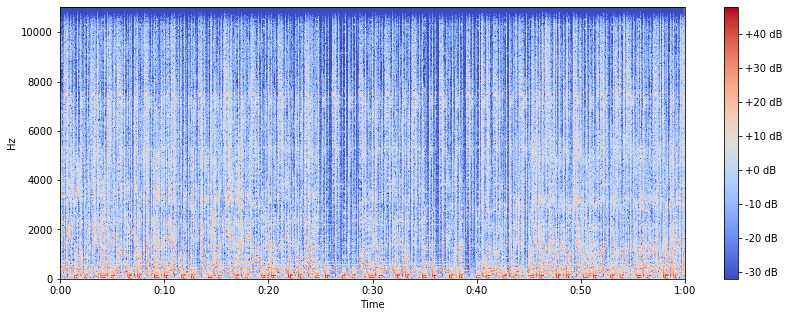

Boyz in The Hood:


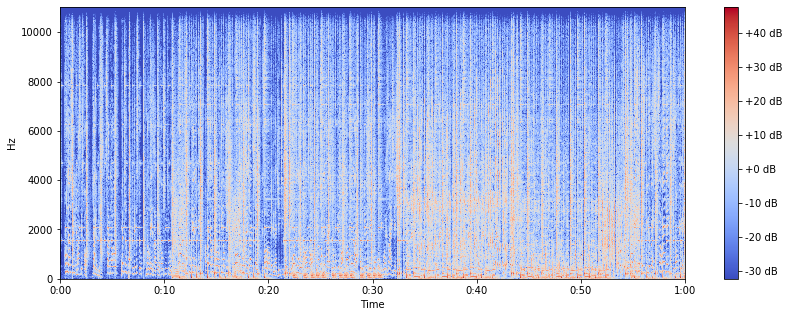

California Love:


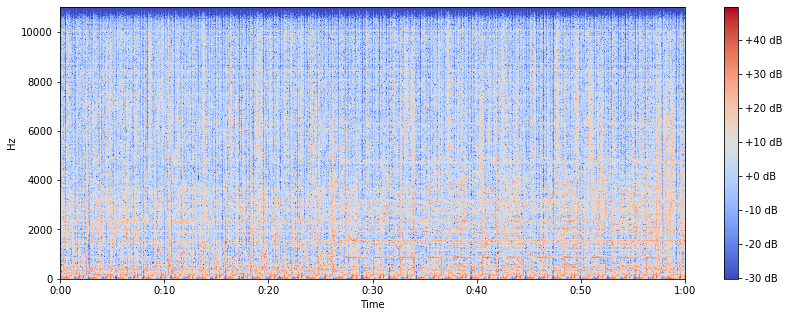

Gin and Juice:


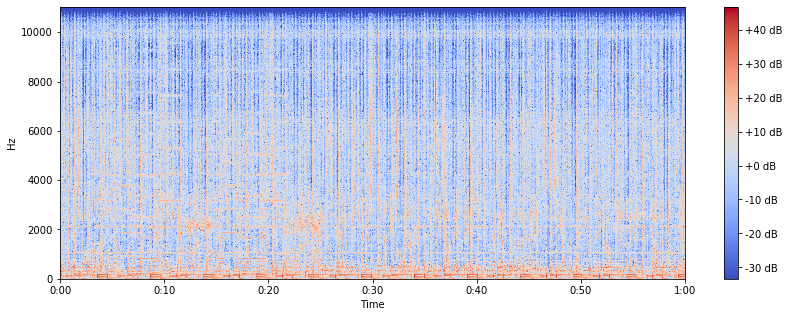

It Was a Good Day:


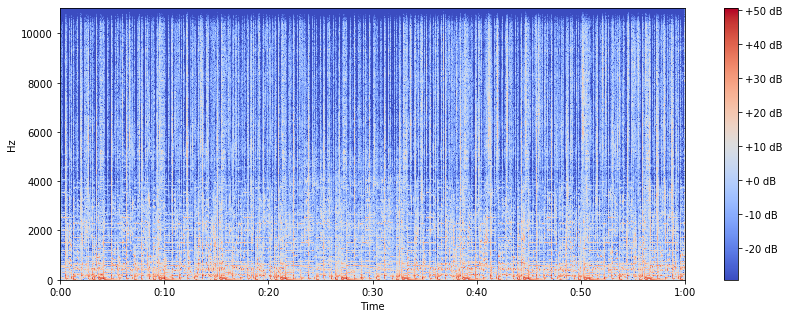

No Vaseline:


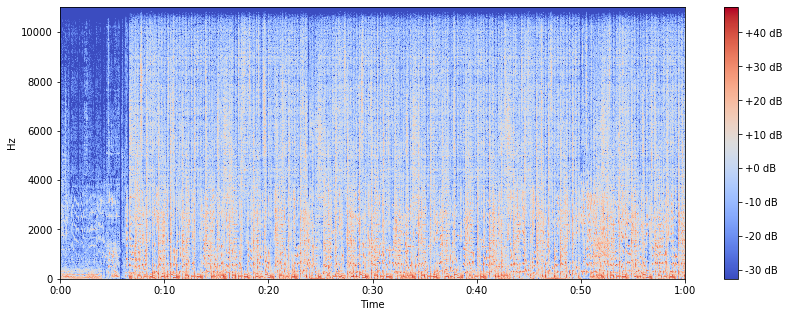

Nuthin But a G Thang:


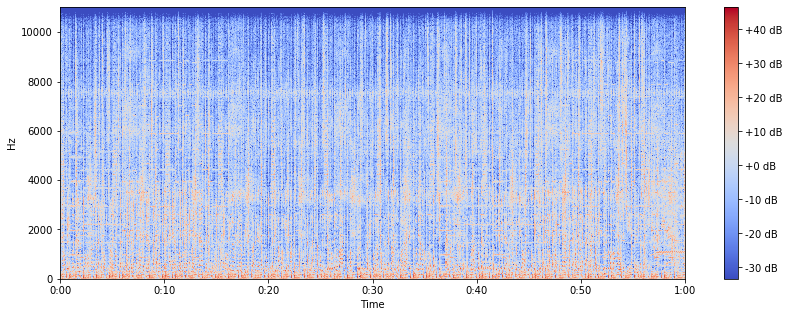

Regulate:


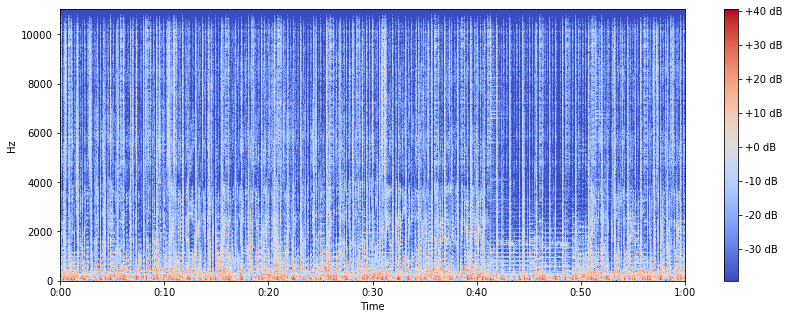

Straight Outta Compton:


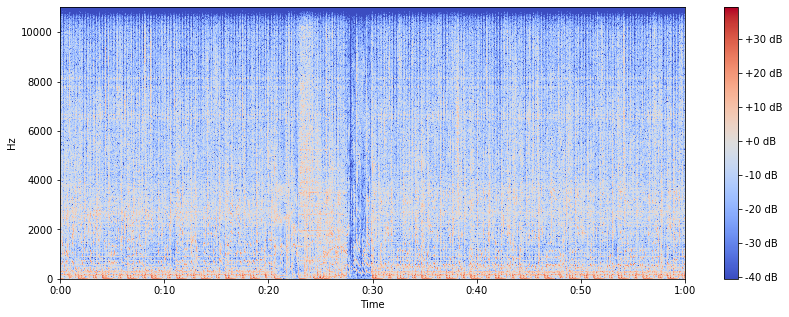

The Next Episode:


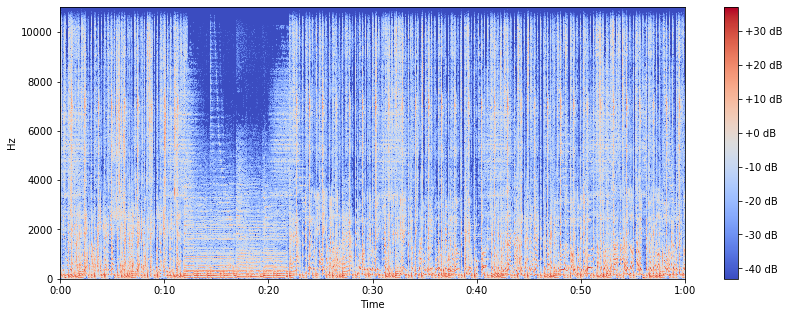

In [78]:
#spectogram for each song
for song in songs:
    x = song[0]
    sr = song[1]
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    print(song[2]+':')
    #color bar showing intensity
    plt.colorbar(format='%+2.0f dB')
    plt.show()